# Loading the Dataset

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import os

#Path to the CSV file
file_path = 'bank-full.csv'

#Checking if the file exists
if os.path.exists(file_path):
    df = pd.read_csv(file_path, sep=';', quotechar='"')
    print("Data loaded successfully!")
else:
    print("File not found!")
    
#Check no of rows
num_rows = len(df)
print("--------------------------------------")
print(f"{num_rows} rows of data are available")

#Display the first 50 rows of the DataFrame
df.head(50)

Data loaded successfully!
--------------------------------------
45211 rows of data are available


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


# Checking for Missing or Duplicate Values

In [2]:
#Check for duplicate rows
duplicate_rows = df[df.duplicated()]

#Display and remove duplicate rows
if not duplicate_rows.empty:
    df = df.drop_duplicates()
    print("Duplicate rows found and removed.")
else:
    print("No duplicate rows found.")

print("-----------------------------")
    
#Check for missing values
missing_columns = df.columns[df.isnull().any()]

#Display columns with missing values and the number of missing values
if missing_columns.empty:
    print("No missing values in any column.")
else:
    print("Missing values present:")
    for col in missing_columns:
        missing_count = df[col].isnull().sum()
        print(f"{col}: {missing_count} missing values")

No duplicate rows found.
-----------------------------
No missing values in any column.


# Pre-Processing - Encoding Categorical Variables

In [3]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import category_encoders as ce

#Define the mapping of values to labels for the 'education' column
education_mapping = {'primary': 1, 'secondary': 2, 'tertiary': 3, 'unknown': 0}

#Perform label encoding for the 'education' column
df['education'] = df['education'].map(education_mapping)

#Encode binary variables using binary encoding (housing, loan and default)
binary_encoder = ce.BinaryEncoder(cols=['housing', 'loan', 'default'])
df_encoded = binary_encoder.fit_transform(df)

#Perform one-hot encoding for the 'marital_status','method','job','month' columns
df_encoded = pd.get_dummies(df_encoded, columns=['marital', 'contact', 'job', 'month'])

#Display the encoded DataFrame
df_encoded.head(50)

,age,education,default_0,default_1,balance,housing_0,housing_1,loan_0,loan_1,day,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,58,3,0,1,2143,0,1,0,1,5,...,False,False,False,False,False,False,True,False,False,False
1,44,2,0,1,29,0,1,0,1,5,...,False,False,False,False,False,False,True,False,False,False
2,33,2,0,1,2,0,1,1,0,5,...,False,False,False,False,False,False,True,False,False,False
3,47,0,0,1,1506,0,1,0,1,5,...,False,False,False,False,False,False,True,False,False,False
4,33,0,0,1,1,1,0,0,1,5,...,False,False,False,False,False,False,True,False,False,False
5,35,3,0,1,231,0,1,0,1,5,...,False,False,False,False,False,False,True,False,False,False
6,28,3,0,1,447,0,1,1,0,5,...,False,False,False,False,False,False,True,False,False,False
7,42,3,1,0,2,0,1,0,1,5,...,False,False,False,False,False,False,True,False,False,False
8,58,1,0,1,121,0,1,0,1,5,...,False,False,False,False,False,False,True,False,False,False
9,43,2,0,1,593,0,1,0,1,5,...,False,False,False,False,False,False,True,False,False,False


# Pre-Processing - Normalization of Variables

In [4]:
from sklearn.preprocessing import StandardScaler,RobustScaler

#Scaling 'duration' column using StandardScaler
scaler_duration = StandardScaler()
df_encoded['duration'] = scaler_duration.fit_transform(df_encoded[['duration']])

#Scaling 'balance' column using RobustScaler
scaler_balance = RobustScaler()
df_encoded['balance'] = scaler_balance.fit_transform(df_encoded[['balance']])

#Display the encoded and scaled DataFrame
df_encoded.head(50)

,age,education,default_0,default_1,balance,housing_0,housing_1,loan_0,loan_1,day,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,58,3,0,1,1.250000,0,1,0,1,5,...,False,False,False,False,False,False,True,False,False,False
1,44,2,0,1,-0.308997,0,1,0,1,5,...,False,False,False,False,False,False,True,False,False,False
2,33,2,0,1,-0.328909,0,1,1,0,5,...,False,False,False,False,False,False,True,False,False,False
3,47,0,0,1,0.780236,0,1,0,1,5,...,False,False,False,False,False,False,True,False,False,False
4,33,0,0,1,-0.329646,1,0,0,1,5,...,False,False,False,False,False,False,True,False,False,False
5,35,3,0,1,-0.160029,0,1,0,1,5,...,False,False,False,False,False,False,True,False,False,False
6,28,3,0,1,-0.000737,0,1,1,0,5,...,False,False,False,False,False,False,True,False,False,False
7,42,3,1,0,-0.328909,0,1,0,1,5,...,False,False,False,False,False,False,True,False,False,False
8,58,1,0,1,-0.241150,0,1,0,1,5,...,False,False,False,False,False,False,True,False,False,False
9,43,2,0,1,0.106932,0,1,0,1,5,...,False,False,False,False,False,False,True,False,False,False


# Pre-Processing - Feature Reduction

In [5]:
#Feature reduction by dropping unwanted columns

#Drop 'pdays' and 'previous' columns from the DataFrame
df_encoded.drop(['pdays', 'poutcome'], axis=1, inplace=True)

#Display the modified DataFrame
df_encoded.head()


,age,education,default_0,default_1,balance,housing_0,housing_1,loan_0,loan_1,day,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,58,3,0,1,1.250000,0,1,0,1,5,...,False,False,False,False,False,False,True,False,False,False
1,44,2,0,1,-0.308997,0,1,0,1,5,...,False,False,False,False,False,False,True,False,False,False
2,33,2,0,1,-0.328909,0,1,1,0,5,...,False,False,False,False,False,False,True,False,False,False
3,47,0,0,1,0.780236,0,1,0,1,5,...,False,False,False,False,False,False,True,False,False,False
4,33,0,0,1,-0.329646,1,0,0,1,5,...,False,False,False,False,False,False,True,False,False,False


# Training and Testing the Model

In [6]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

#Separate features (X) and target variable (y)
X = df_encoded.drop('y', axis=1)
y = df_encoded['y']

#Encode the string labels into numeric labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

#Split the dataset into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20)

#Initialize XGBoost classifier
xgb_model = XGBClassifier()

#Train the XGBoost model
xgb_model.fit(X_train, y_train)

#Evaluate the model
train_accuracy = xgb_model.score(X_train, y_train)
test_accuracy = xgb_model.score(X_test, y_test)

print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Testing Accuracy: {test_accuracy:.2f}")



Training Accuracy: 0.95
Testing Accuracy: 0.91


# Evaluating the Model

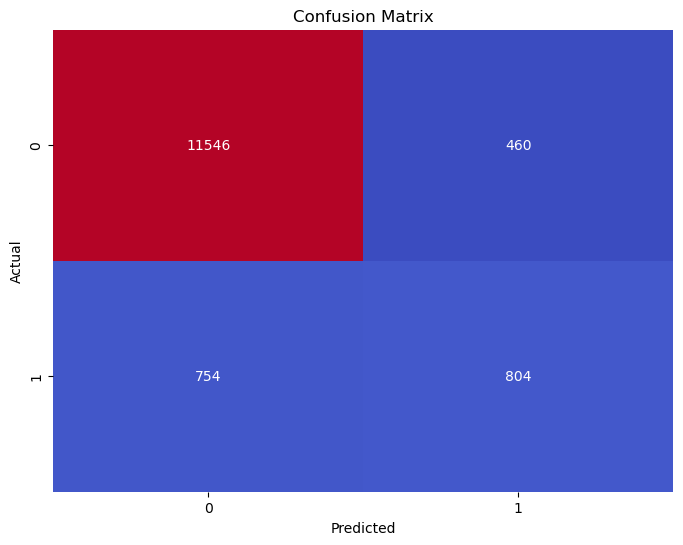

Accuracy: 0.91

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95     12006
           1       0.64      0.52      0.57      1558

    accuracy                           0.91     13564
   macro avg       0.79      0.74      0.76     13564
weighted avg       0.90      0.91      0.91     13564



In [8]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

#Predict on the test set
y_pred = xgb_model.predict(X_test)

#Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

#Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

#Print classification report
print('\nClassification Report:')
print(classification_report(y_test, y_pred))
